# 1번 그래프

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. 데이터 로드
df = pd.read_csv('quad_analysis2.csv')
cols_to_norm = ['CAGR', 'avg_naver', 'blog_post']

# 2. StandardScaler 적용 (Min-Max 대신 사용)
scaler = StandardScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df[cols_to_norm]), columns=cols_to_norm)

# 3. 가중치 설정
w1, w2, w3 = 0.34, 0.33, 0.33

# 4. 종합 X지수 생성 (StandardScaler 기반이므로 평균 근처가 0이 됨)
df['X_Index'] = (df_norm['CAGR'] * w1) + (df_norm['avg_naver'] * w2) + (df_norm['blog_post'] * w3)

# --- 시각화 업그레이드 ---
plt.rc('font', family='Malgun Gothic') # 맥은 'AppleGothic'
plt.figure(figsize=(12, 8))

# 기준선 설정 (평균값)
x_mean = df['X_Index'].mean()
y_mean = df['하이브리드_점수'].mean()

# 사분면별로 색상을 다르게 지정하여 가독성 증대
for i in range(len(df)):
    x = df['X_Index'][i]
    y = df['하이브리드_점수'][i]
    
    # 색상 조건 (우상:빨강, 좌상:노랑, 좌하:회색, 우하:파랑)
    if x >= x_mean and y >= y_mean: color = '#e74c3c'
    elif x < x_mean and y >= y_mean: color = '#f1c40f'
    elif x < x_mean and y < y_mean: color = '#95a5a6'
    else: color = '#3498db'
        
    plt.scatter(x, y, c=color, s=100, alpha=0.7, edgecolors='white')
    plt.annotate(df['행정동'][i], (x, y), xytext=(5, 5), textcoords='offset points', fontsize=9)

# 평균 가이드라인 추가
plt.axvline(x_mean, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.axhline(y_mean, color='black', linestyle='--', linewidth=1, alpha=0.5)

plt.xlabel(f'종합 지표 (Standardized, 가중치 {w1}:{w2}:{w3})')
plt.ylabel('하이브리드 점수 (Y축)')
plt.title('행정동 사분면 분석 (StandardScaler 적용)')
plt.grid(True, alpha=0.2)

# 각 사분면 설명 추가
plt.text(plt.xlim()[1], plt.ylim()[1], ' 핵심지역 ', ha='right', va='top', bbox=dict(facecolor='white', alpha=0.5))
plt.text(plt.xlim()[0], plt.ylim()[1], ' 잠재지역 ', ha='left', va='top', bbox=dict(facecolor='white', alpha=0.5))

plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# StandardScaler 결과값(X_Index)의 평균을 기준으로 사분면 재분류
x_threshold = df['X_Index'].mean()
y_threshold = df['하이브리드_점수'].mean()

obs = pd.crosstab(df['X_Index'] >= x_threshold, df['하이브리드_점수'] >= y_threshold)
chi2, p, dof, expected = chi2_contingency(obs)

print(f"--- StandardScaler 기반 검정 결과 ---")
print(f"카이제곱 통계량: {chi2:.4f}")
print(f"P-value: {p:.4f}")

# 2번 그래프

In [4]:
import os
os.environ["PATH"] += os.pathsep + os.path.expanduser("~/.local/bin")

In [8]:
!uv add matplotlib

Resolved 14 packages in 263ms                                        
⠙ Preparing packages... (0/7)                                                   ⠋ Preparing packages... (0/0)                                                   
⠙ Preparing packages... (0/7)-------------------     0 B/119.90 KiB          
⠙ Preparing packages... (0/7)------------------- 16.00 KiB/119.90 KiB        
⠙ Preparing packages... (0/7)------------------- 16.00 KiB/119.90 KiB        
cycler               ------------------------------     0 B/8.13 KiB
⠙ Preparing packages... (0/7)------------------- 16.00 KiB/119.90 KiB        
cycler               ------------------------------ 8.13 KiB/8.13 KiB
⠙ Preparing packages... (0/7)------------------- 16.00 KiB/119.90 KiB        
cycler               ------------------------------ 8.13 KiB/8.13 KiB
⠙ Preparing packages... (0/7)------------------- 16.00 KiB/119.90 KiB        
⠙ Preparing packages... (0/7)------------------- 16.00 KiB/119.90 KiB        
⠙ Preparing pa

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/Users/ids/Documents/data/sta2dataProject/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ids/Documents/data/sta2dataProject/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ids/Documents/data/sta2dataProject/.venv/lib/python3.13/site-packages/IPython/core/

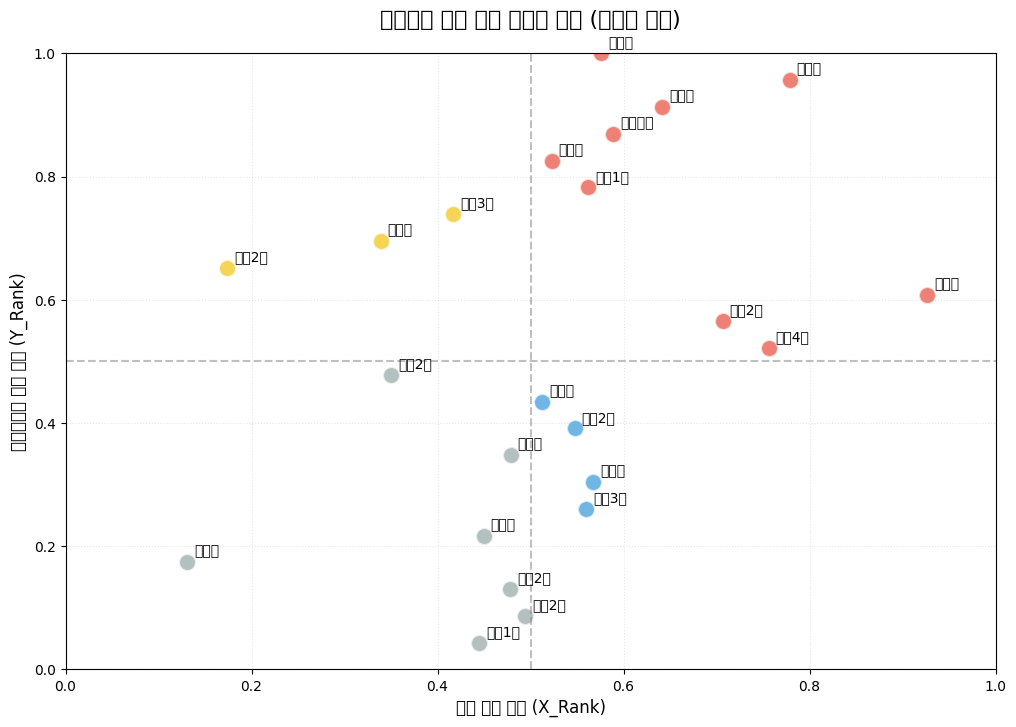

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 로드 (및 가산동 제외 = optional)
df = pd.read_csv('./raw_data/xy.csv', encoding='cp949')
# df = df[df['행정동'] != '가산동'].reset_index(drop=True)

cols_to_norm = ['CAGR', 'avg_naver', 'blog_post']

# 2. 순위(Rank) 변환 (0~1 사이의 백분위로 변환)
# 이 작업이 데이터 쏠림을 방지하고 그래프를 사방으로 펼쳐줍니다.
df_rank = df[cols_to_norm].rank(pct=True)

# 3. 가중치 균등 설정 (0.34, 0.33, 0.33)
w1, w2, w3 = 0.34, 0.33, 0.33 

# 4. 종합 X지수 생성 (순위 기반)
df['X_Index'] = (df_rank['CAGR'] * w1) + (df_rank['avg_naver'] * w2) + (df_rank['blog_post'] * w3)
# Y축(하이브리드 점수)도 순위로 변환하여 밸런스를 맞춥니다.
df['Y_Index'] = df['하이브리드_점수'].rank(pct=True)

# 5. 시각화
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(12, 8))

# 순위 기반이므로 기준선은 정확히 중앙인 0.5가 됩니다.
x_mean = 0.5
y_mean = 0.5

for i in range(len(df)):
    x, y = df['X_Index'][i], df['Y_Index'][i]
    
    # 사분면 색상 로직
    if x >= x_mean and y >= y_mean: color = '#e74c3c' # 1사분면(핵심)
    elif x < x_mean and y >= y_mean: color = '#f1c40f' # 2사분면(잠재)
    elif x < x_mean and y < y_mean: color = '#95a5a6' # 3사분면(정체)
    else: color = '#3498db' # 4사분면(효율)
    
    plt.scatter(x, y, c=color, s=150, alpha=0.7, edgecolors='white', linewidth=1.5)
    plt.annotate(df['행정동'][i], (x, y), xytext=(5, 5), 
                 textcoords='offset points', fontsize=10)

# 중앙 가이드라인 (0.5 지점)
plt.axvline(x_mean, color='gray', linestyle='--', alpha=0.5)
plt.axhline(y_mean, color='gray', linestyle='--', alpha=0.5)

plt.title('행정동별 순위 기반 사분면 분석 (가중치 균등)', fontsize=16, pad=20)
plt.xlabel('종합 지표 순위 (X_Rank)', fontsize=12)
plt.ylabel('하이브리드 점수 순위 (Y_Rank)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.3)

# 축 범위를 0~1로 고정하여 꽉 차게 보이게 함
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.show()

In [ ]:
from scipy.stats import chi2_contingency

# 사분면 소속 분류 (0.5 기준)
df['quad'] = '3' # 기본 3사분면
df.loc[(df['X_Index'] >= 0.5) & (df['Y_Index'] >= 0.5), 'quad'] = '1'
df.loc[(df['X_Index'] < 0.5) & (df['Y_Index'] >= 0.5), 'quad'] = '2'
df.loc[(df['X_Index'] >= 0.5) & (df['Y_Index'] < 0.5), 'quad'] = '4'

# 교차표 생성 (실제 관측 빈도)
obs = pd.crosstab(df['X_Index'] >= 0.5, df['Y_Index'] >= 0.5)
chi2, p, dof, expected = chi2_contingency(obs)

print(f"카이제곱 통계량: {chi2:.4f}")
print(f"P-value: {p:.4f}")